In [100]:
#Sebastian Zdarowski 
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl
import os 
import pandas as pd





In [387]:
## Get working directory
os.getcwd()


'/Users/Sebastian/Graduate School/DSC - 478 Machine Learning /HW/HW 3/newsgroups5'

In [388]:
## Change working directory
os.chdir('/Users/Sebastian/Graduate School/DSC - 478 Machine Learning /HW/HW 3/communities')

In [389]:
#populate data into dataframe
ComData = pd.read_csv("communities.csv", sep=',')
ComData.head()


,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [390]:
ComData.shape

(1994, 100)

In [391]:
#Compute and display basic statistics (mean, standard deviation, min, max, etc.) 
#for each of the variables in the data set.
ComData.describe(include="all")



,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jacksonvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [392]:
# handle missing data
np.sum(np.array(pd.isnull(ComData)),0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [393]:
ComData.dtypes #look at datatypes to make sure we are only including numeric values 
#OtherPerCap stands out

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap               object
HispPerCap               float64
NumUnderPov              float64
          

In [394]:
ComData.OtherPerCap = pd.to_numeric(ComData.OtherPerCap, errors='coerce')
#ComData.dtypes
#Check for N/As
CheckNa = pd.DataFrame(ComData.isnull().sum(0))
CheckNa
#othercap still has na

,0
state,0
communityname,0
population,0
householdsize,0
racepctblack,0
racePctWhite,0
racePctAsian,0
racePctHisp,0
agePct12t21,0
agePct12t29,0


In [395]:
#replace N.A with mean value for othercap 
othercap = ComData.OtherPerCap.mean()
ComData.OtherPerCap.fillna(othercap, axis = 0, inplace = True)

#CheckNa = pd.DataFrame(ComData.isnull().sum(0))
#CheckNa

In [396]:
# Separate the target attribute for regression.

#per dataset info the attribute to be predicted (Per Capita Violent Crimes).

targetY = ComData['ViolentCrimesPerPop']
#Seperate attributes

#-- state: US state (by number) - not counted as predictive above, but if considered, should be considerd nominal (nominal)
#-- county: numeric code for county - not predictive, and many missing values (numeric)
#Drop State and Community names since they are not considered predictive.. 

F_ComData = ComData.drop(['state', 'communityname', 'ViolentCrimesPerPop'], axis = 1, inplace = False)


In [397]:
targetY.shape
targetY.head() #check target varible 

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [398]:
F_ComData.shape

(1994, 97)

In [399]:
# 1B code from PG 157 Chapter 8 MLA as requsted to be used through assignment. 

def standRegres(xArr, yArr):
    xMat = np.matrix(xArr) ; yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
    else:
        ws = xTx.I * (xMat.T*yMat)
        return ws

In [400]:
# In order to do multiple regression we need to add a column of 1s for x0

xData = np.array(F_ComData)
x = np.array([np.concatenate((v,[1])) for v in xData])


In [401]:
linearStandRegress = standRegres(x,targetY)
#run linear standard regression using mla code 
linearStandRegress #print out matrix 

matrix([[ 1.31108068e-01],
        [-3.14114977e-02],
        [ 2.09909670e-01],
        [-4.05351612e-02],
        [-1.38892919e-02],
        [ 5.89726825e-02],
        [ 1.23399025e-01],
        [-2.22621600e-01],
        [-1.47500199e-01],
        [ 5.01635477e-02],
        [-2.42413829e-01],
        [ 4.64024392e-02],
        [-1.96945615e-01],
        [-2.06117500e-01],
        [ 4.65935490e-02],
        [-1.77212915e-01],
        [ 6.30148504e-02],
        [ 1.14942190e-02],
        [-9.08951848e-02],
        [ 2.74640044e-01],
        [ 1.01752476e-01],
        [-3.31517562e-01],
        [-2.91799268e-02],
        [-3.54483393e-02],
        [ 2.26173855e-02],
        [ 4.30950137e-02],
        [ 3.44408548e-02],
        [ 1.28412458e-01],
        [-1.91293360e-01],
        [-1.00769002e-01],
        [ 6.46856092e-02],
        [ 1.06062117e-01],
        [ 2.44125993e-06],
        [ 2.34984611e-01],
        [-3.75705330e-02],
        [-7.74957660e-03],
        [ 4.66779619e-01],
 

In [402]:
#RMSE calculation 

# Create linear regression object, taken from regression notebook presented in class. 
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,targetY)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [403]:
# Compute RMSE on training data
p = linreg.predict(x)

# Now we can constuct a vector of errors
err = abs(p-targetY)


In [404]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)


# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print (rmse_train)


0.12888960779787606


In [405]:
#Display the obtained regression coefficients (weights)
#view the regression coefficients
print ('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ 1.31108068e-01 -3.14114977e-02  2.09909670e-01 -4.05351612e-02
 -1.38892919e-02  5.89726825e-02  1.23399025e-01 -2.22621600e-01
 -1.47500199e-01  5.01635477e-02 -2.42413829e-01  4.64024392e-02
 -1.96945615e-01 -2.06117500e-01  4.65935490e-02 -1.77212915e-01
  6.30148504e-02  1.14942190e-02 -9.08951848e-02  2.74640044e-01
  1.01752476e-01 -3.31517562e-01 -2.91799268e-02 -3.54483393e-02
  2.26173855e-02  4.30950137e-02  3.44408548e-02  1.28412458e-01
 -1.91293360e-01 -1.00769002e-01  6.46856092e-02  1.06062117e-01
  2.44125996e-06  2.34984611e-01 -3.75705330e-02 -7.74957660e-03
  4.66779619e-01  2.26295907e-01  1.74621953e-01 -5.75206227e-01
 -1.41954207e-01  5.68782538e-02 -3.51066745e-01 -3.49493414e-02
  4.63705978e-04  5.57016681e-02 -1.82238360e-01 -1.54646442e-01
  1.26172899e-01 -1.44320569e-01  2.39071713e-02  3.33390229e-02
 -7.42297409e-02  3.59876412e-02 -3.31691535e-02 -2.18174916e-01
  4.45777391e-01 -2.00030978e-01 -2.67307658e-02 -1.41457254e-0

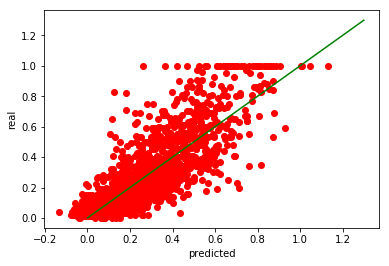

In [406]:
# Plot outputs predicted vs real value 
%matplotlib inline
pl.plot(p, targetY,'ro')
pl.plot([0,1.3],[0,1.3], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [407]:
#Finally, perform 10-fold cross- validation and compare the cross-validation 
#RMSE to the training RMSE (for cross validation, you should use the 
#KFoldmodule from sklearn.cross_validation).
# Now let's compute RMSE using 10-fold x-validation
n = 10
kf = KFold(len(x), n_folds=n)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],targetY[train])
    p = linreg.predict(x[test])
    e = p-targetY[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n


method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)




Method: Simple Linear Regression
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1359


In [408]:
#1C
#data set names / x and targetY
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, targetY, test_size = 0.2, random_state = 33)

from sklearn import feature_selection
from sklearn import cross_validation


percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(x_train, y_train)
    scores = abs(cross_validation.cross_val_score(linreg, X_train_fs, y_train, cv=5))
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n")
optimal_num_features = int(percentiles[optimal_percentile]*len(x.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")


/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/Sebastian/anaconda3/lib/pyth

1 0.5497462154012411
6 0.6094624178069088
11 0.6188591701442955
16 0.6234219314963412
21 0.6341268202083287
26 0.6491115775710352
31 0.6518299912475541
36 0.6525499626379327
41 0.6532826916764793
46 0.6517898644360777
51 0.650180868861667
56 0.652239004867672
61 0.6532579587547073


/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/Sebastian/anaconda3/lib/pyth

66 0.6540008668740999
71 0.6529207201190572
76 0.6578787053126556
81 0.6573210580404087


/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/Sebastian/anaconda3/lib/pyth

86 0.657800840577771
91 0.6574528507097727
96 0.6580999906856861


/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/Sebastian/anaconda3/lib/pyth

TypeError: only integer scalar arrays can be converted to a scalar index

In [409]:
#1d run ridge and lasso reggression 

# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

In [410]:
#Create testing and training data split. 
x_train, x_test, y_train, y_test = train_test_split(x, targetY, test_size = 0.2, random_state = 33)

In [411]:
# Train the model using the training set
ridge.fit(x_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [416]:
# Compute RMSE on training data
p = ridge.predict(x)
err = p-targetY #target y is our predictor variable 
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 5-fold x-validation

n = 5 #use 5 for K folds as required by HW
kf = KFold(len(x), n_folds=n)
xval_err = 0
for train,test in kf:
    ridge.fit(x[train],targetY[train])
    p = linreg.predict(x[test])
    e = p-targetY[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
rmse_10cv = xval_err/n


method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)



Method: Ridge Regression
RMSE on training: 0.1302
RMSE on 10-fold CV: 0.1290


In [424]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(x_train,y_train)
    p = ridge.predict(x)
    err = p-targetY
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(len(x), n_folds=10)
    xval_err = 0
    for train, test in kf:
        ridge.fit(x[train], targetY[train])
        p = ridge.predict(x[test])
        err = p - targetY[test]
        xval_err += np.sqrt(np.dot(err,err)/len(x[test]))
    rmse_10cv = xval_err/n
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1298		 0.2715
0.418	 0.1303		 0.2701
0.826	 0.1306		 0.2700
1.234	 0.1309		 0.2700
1.642	 0.1312		 0.2701
2.050	 0.1314		 0.2702
2.458	 0.1316		 0.2703
2.866	 0.1318		 0.2704
3.274	 0.1320		 0.2705
3.682	 0.1321		 0.2706
4.090	 0.1323		 0.2707
4.498	 0.1324		 0.2708
4.906	 0.1326		 0.2709
5.313	 0.1327		 0.2710
5.721	 0.1328		 0.2711
6.129	 0.1329		 0.2712
6.537	 0.1330		 0.2713
6.945	 0.1331		 0.2714
7.353	 0.1332		 0.2715
7.761	 0.1333		 0.2716
8.169	 0.1333		 0.2716
8.577	 0.1334		 0.2717
8.985	 0.1335		 0.2718
9.393	 0.1336		 0.2719
9.801	 0.1337		 0.2719
10.209	 0.1337		 0.2720
10.617	 0.1338		 0.2721
11.025	 0.1339		 0.2722
11.433	 0.1339		 0.2722
11.841	 0.1340		 0.2723
12.249	 0.1340		 0.2723
12.657	 0.1341		 0.2724
13.065	 0.1341		 0.2725
13.473	 0.1342		 0.2725
13.881	 0.1343		 0.2726
14.289	 0.1343		 0.2726
14.697	 0.1344		 0.2727
15.104	 0.1344		 0.2728
15.512	 0.1345		 0.2728
15.920	 0.1345		 0.2729
16.328	 0.1346		 0

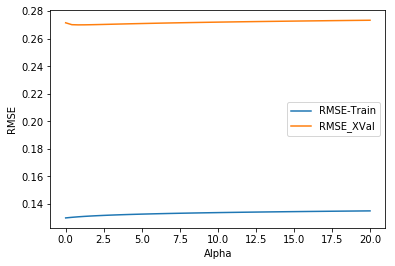

In [425]:
pl.plot(alpha, t_rmse, label='RMSE-Train') #plot ridge regression 
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [413]:
a = 0.4 #code taken frm regression python notebook discussed in class, aplha selected above 
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,targetY)
    p = met.predict(x)
    e = p-targetY
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(len(x), n_folds=5)
    err = 0
    for train,test in kf:
        met.fit(x[train],targetY[train])
        p = met.predict(x[test])
        e = p-targetY[test]
        err += np.dot(e,e)
    rmse_10cv = np.sqrt(err/len(x))
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 5-fold CV: %.4f' %rmse_10cv)
    print ("\n")

# we See that K fold CV valdition performed better for lasso and elastic-net regression than for ridge or standard 
#linear regression 

Method: linear regression
RMSE on training: 0.1289
RMSE on 5-fold CV: 0.1376


Method: lasso
RMSE on training: 0.2329
RMSE on 5-fold CV: 0.2331


Method: ridge
RMSE on training: 0.1290
RMSE on 5-fold CV: 0.1369


Method: elastic-net
RMSE on training: 0.2329
RMSE on 5-fold CV: 0.2331




In [99]:
#1E Next, perform regression using Stochastic Gradient Descent for regression.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

sgdreg = SGDRegressor(penalty='l2', alpha=0.1, n_iter=300)

# Compute RMSE on training data
sgdreg.fit(x_s,targetY)
p = sgdreg.predict(x_s)
err = p-targetY
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(x[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x[train])
    xtest_s = scaler.transform(x[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,targetY[train])
    p = sgdreg.predict(xtest_s)
    e = p-targetY[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)


/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/Sebastian/anacond

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1328
RMSE on 10-fold CV: 0.1367


In [428]:
#Question 2 

## Get working directory
os.getcwd()


'/Users/Sebastian/Graduate School/DSC - 478 Machine Learning /HW/HW 3/newsgroups5'

In [427]:
## Change working directory
os.chdir('/Users/Sebastian/Graduate School/DSC - 478 Machine Learning /HW/HW 3/newsgroups5')



In [429]:
#loading in dataset 

class_x = pd.DataFrame(np.genfromtxt("classes.txt", delimiter=' ', dtype=int, skip_header=1))

#populate train classes data into dataframe


#class_x
class_x = class_x.drop(class_x.columns[0], axis=1)
class_x.head(10)
#class_x.shape


,1
0,0
1,1
2,1
3,1
4,2
5,1
6,3
7,4
8,1
9,1


In [430]:
#matrix_x = pd.DataFrame(np.genfromtxt("matrix.txt", delimiter=',', dtype=int))
#matrix_x.shape

#populate data into dataframe
matrix_x = pd.read_csv("matrix.txt", header=None,sep=',')
matrix_x_np = np.array(matrix_x).T #transpose so we get same rows as classes
matrix_x_np.shape

(2500, 9328)

In [431]:
terms_x = pd.DataFrame(np.genfromtxt("terms.txt", delimiter='\t', dtype=str))
terms_x.shape
terms_x_np = np.array(terms_x)
terms_x_np.shape
#all data has been loaded in 

terms_xc = pd.read_csv("terms.txt", header=None,sep='\t')


terms_xc = terms_x.loc[:,0]
terms_xc.head()

0        aa
1     aargh
2     aaron
3    aaronc
4        ab
Name: 0, dtype: object

In [432]:
#create testing / training set data

x_train, x_test, y_train, y_test = train_test_split(matrix_x_np, class_x, test_size = 0.2, random_state = 33)
#do 80 / 20 split 

x_train.shape

(2000, 9328)

In [433]:
y_train.shape

(2000, 1)

In [435]:
#set up document term matrix 
news_train = x_train.T


# Find doc freq for each term within matrix 
z = np.array([(news_train!=0).sum(1)]).T

m_document_number = x_train.shape[0] #amount of docments in matrix 
m_term_number = x_train.shape[1] #terms per matrix 

term_ferq = news_train.sum(axis=1)
#create matrix that contains all terms 
updateM = np.ones(np.shape(news_train),dtype = float) * m_document_number

#transform for IDF term matrix
IDF = np.log2(np.divide(updateM, z))

TFIDF_train = np.array(news_train * IDF)


TFIDF_train_2 = TFIDF_train.T #transpose matrix 

#check nulls/reduce any scalers so we dont error out during Kmeans 
TFIDF_train_2[np.isnan(TFIDF_train_2)] = 0




/Users/Sebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/Sebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


In [269]:
#print(m_term_number)
#print(m_document_number)


#print(term_ferq)
#print(updateterm)

In [272]:
## Create term-freqency dictionary
dictTF = {}
for i in range(m_term_number):
               dictTF[terms_xc[i]] = term_ferq[i]
#print (sorted(dictTF.items()))
sortedTF = sorted(dictTF.values(), reverse=True)
#print (sortedTF)


In [279]:
#1A.Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. 
#This is the distance function you will use to pass to the kMeans function
#cosine similarity distance
def cos_sim(a,b):
    #a_norm = np.linealg.norm(a)
    #b_norm = np.linalg.norm(b)
    cos_sim = dot(a, b)/((np.linalg.norm(a))*(np.linalg.norm(b)))
    distance = 1 - cos_sim
    return distance





In [286]:
#2C .Perform Kmeans clustering on the training data. 
#Write a function to display the top N terms in each cluster along with the 
#cluster DF values for each term and the size of the cluster. 


#Created on Feb 16, 2011
#k Means Clustering for Ch10 of Machine Learning in Action
#@author: Peter Harrington
#2'''
from numpy import *

def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 

def kMeans(dataSet, k, distMeas=cos_sim, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment




In [359]:
#run k means function get centriods and clusters
centroids, clusters = kMeans(TFIDF_train_2, 5, distMeas= cos_sim)


In [360]:
print (centroids)
for i in clusters: #HG code clusters
    print (i)
    # we see that we have 5 clusters within data, ranging from 0 to 4

[[0.04729524 0.         0.         ... 0.05777266 0.03178488 0.17331799]
 [0.00978229 0.04300136 0.5443276  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.24572304 0.         0.        ]
 [0.04328079 0.         0.07297954 ... 0.         0.         0.        ]
 [0.03742399 0.         0.0473279  ... 0.         0.         0.        ]]
[3.         0.79455678]
[4.         0.90717614]
[3.         0.74759438]
[3.        0.7431077]
[0.         0.77789536]
[1.         0.72358976]
[4.         0.59927222]
[1.         0.71872928]
[1.         0.88740746]
[3.        0.6286945]
[3.         0.67390122]
[1.         0.66239237]
[3.         0.51277903]
[1.         0.69024717]
[1.         0.78000884]
[1.         0.86120841]
[4.         0.52459449]
[1.         0.84671451]
[3.         0.79730249]
[3.         0.58030208]
[1.         0.78468566]
[4.         0.77464011]
[4.         0.48784101]
[1.        0.8270334]
[3.         0.63453378]
[3.         0.74855176]
[1.         0.92

[3.         0.82631628]
[1.         0.74804773]
[1.         0.75926844]
[1.         0.75405798]
[1.         0.80356704]
[3.         0.70619447]
[1.         0.58977148]
[3.        0.7465948]
[0.      0.32852]
[1.        0.7787862]
[1.         0.85414035]
[4.         0.73105886]
[4.         0.72869201]
[1.         0.71354029]
[3.         0.78559526]
[0.         0.70826947]
[3.        0.8158309]
[1.         0.52503539]
[1.         0.68855716]
[1.         0.77073956]
[1.         0.69108073]
[4.         0.71614996]
[0.         0.76586691]
[3.         0.66678174]
[0.         0.70475003]
[1.         0.91863368]
[0.         0.52928584]
[0.        0.8157326]
[1.         0.69580793]
[4.         0.60480551]
[1.         0.80958456]
[3.       0.719728]
[1.         0.80732477]
[3.         0.51561688]
[4.         0.47173478]
[1.         0.59455319]
[1.         0.73763674]
[3.        0.6833216]
[0.         0.85990928]
[0.         0.86276148]
[4.         0.74109328]
[4.         0.58430558]
[4.         

[3.         0.75774922]
[0.       0.657274]
[4.         0.83406286]
[0.         0.72099712]
[1.         0.51445949]
[4.         0.68899221]
[3.         0.69171634]
[1.         0.72343917]
[4.         0.79304174]
[1.         0.85370561]
[1.         0.46720101]
[4.        0.6263426]
[1.         0.71797834]
[1.         0.69354441]
[3.         0.41683862]
[4.       0.632457]
[1.         0.67637952]
[0.         0.54905916]
[1.         0.59255565]
[1.         0.85173202]
[1.         0.73473214]
[4.         0.76044292]
[1.         0.40306224]
[1.         0.84160994]
[1.         0.79645562]
[1.         0.67833061]
[1.         0.63346954]
[1.         0.57290147]
[4.         0.64151364]
[0.         0.52616459]
[0.         0.62543599]
[3.        0.6427458]
[0.        0.8084139]
[1.         0.70122181]
[3.         0.63512528]
[1.         0.82205084]
[3.         0.97066665]
[0.         0.71245832]
[3.         0.64215257]
[4.         0.80439315]
[0.         0.53283599]
[1.         0.53018978]
[0.   

[1.         0.62969438]
[4.         0.63004747]
[1.         0.63264951]
[0.         0.67587538]
[4.         0.74286001]
[1.         0.57916203]
[1.         0.75782585]
[1.         0.75907557]
[1.         0.63823414]
[4.        0.6159509]
[3.         0.71530381]
[4.         0.46950203]
[0.         0.78693325]
[0.         0.76982804]
[0.         0.79150108]
[1.         0.83192633]
[1.         0.76838773]
[4.         0.32822224]
[1.        0.7081892]
[1.         0.64064951]
[3.         0.74917852]
[1.         0.82321862]
[4.         0.50124344]
[1.         0.76634852]
[4.         0.68501376]
[0.         0.71849469]
[1.         0.51570901]
[4.         0.79334292]
[4.         0.77435472]
[4.         0.66081388]
[1.        0.5698628]
[4.         0.47388915]
[3.         0.79372057]
[1.         0.76557932]
[1.         0.70233549]
[3.         0.70891704]
[4.         0.71002409]
[3.         0.65409389]
[1.         0.63937001]
[4.         0.66447999]
[0.         0.58586692]
[1.         0.65340253

In [372]:
from sklearn.cluster import KMeans  

In [373]:
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1) # initialization
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)


In [379]:
kmeans.fit(TFIDF_train_2) # run kmeans on training data set using sklearn without term ferq doc, was causing all 
#clusters to be 0 

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 87119978.60946809
start iteration
done sorting
end inner loop
Iteration 1, inertia 87119978.60946809
center shift 0.000000e+00 within tolerance 1.186616e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 87119978.60946809
start iteration
done sorting
end inner loop
Iteration 1, inertia 87119978.60946809
center shift 0.000000e+00 within tolerance 1.186616e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 87119978.60946809
start iteration
done sorting
end inner loop
Iteration 1, inertia 87119978.60946809
center shift 0.000000e+00 within tolerance 1.186616e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 87119978.60946809
start iteration
done sorting
end inner loop
Iteration 1, inertia 87119978.60946809
center shift 0.000000e+00 within tolerance 1.186616e-01
Initialization c

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [382]:
clusters_2 = kmeans.predict(TFIDF_train_2) #predict values for clusters 

In [383]:
print(clusters_2) 
clusters.shape
target = y_train.T
target.shape

[0 0 0 ... 0 0 0]


(2, 2000)

In [377]:
#2D
from sklearn.metrics import completeness_score, homogeneity_score

print (completeness_score(target[0],clusters[0]))
#code was erroring out unless I selected 1 column from each input selected 


0.0


In [378]:
print (homogeneity_score(target[0],clusters[0]))

1.0


In [ ]:
# part e run testing based on former clusters labels 

